In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
plt.style.use('seaborn')
style = {
    'figure.figsize': (12, 8),
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 14,
}
rcParams.update(style)

# Prob 2.2

$\rho_c$ is given, and $\langle \rho \rangle$ can be calculated by
$$
\langle \rho \rangle = \frac{M}{4/3 \pi R^3}
$$

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/achatman/astro580/master/homework/prob7.2.csv', header=1, names=['M', 'R_10', 'rho_c'])
data['rho_avg'] = data['M'] * 1.989e33 / (4/3 * np.pi * (data['R_10']*1e10)**3) # g cm^-2
ratio = data['rho_c'] / data['rho_avg']
ratio

0     24.137983
1     24.471652
2     25.754221
3     27.373778
4     30.620251
5     35.056104
6     40.579520
7     52.211674
8     54.079587
9     72.925743
10    82.520832
11    93.701350
12    97.274822
13    84.224789
14    57.638589
15    23.331930
16    25.850569
17    16.570771
18    18.891631
19    10.074858
20     6.509051
21     6.643083
22     5.987396
23     5.602806
dtype: float64

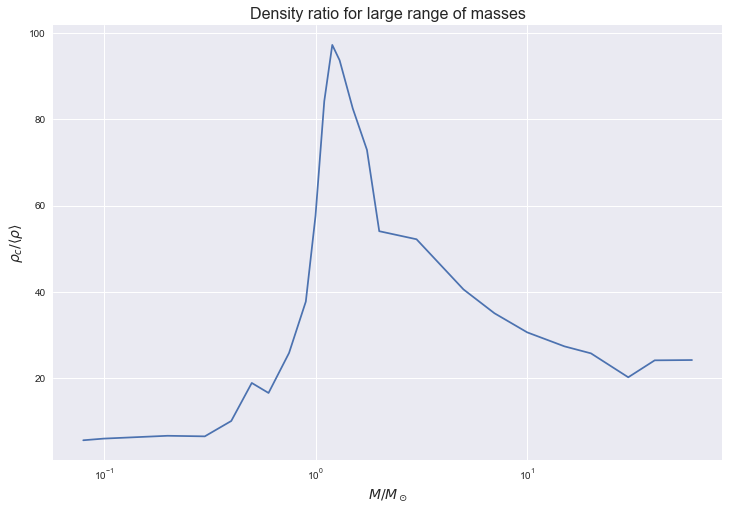

In [49]:
plt.figure()
plt.semilogx(data['M'], ratio)
plt.xlabel(r'$M/M_\odot$')
plt.ylabel(r'$\rho_c / \langle \rho \rangle$')
plt.title('Density ratio for large range of masses');

# Prob 2.4

## Equations and boundary conditions
$$
\frac{1}{\xi^2} \frac{d}{d\xi}\left( \xi^2 \frac{d\theta_n}{d\xi} \right)=-\theta_n^n
$$

$$
\theta_n(0)=1,\quad \frac{d\theta_n}{d\xi}=0\text{ at }\xi=0, \quad \theta_n \rightarrow 0 \text{ at surface}
$$

$$
x=\xi,\quad y=\theta_n,\quad z=\frac{d\theta_n}{d\xi}=\frac{dy}{dx}
$$

$$
y' = \frac{dy}{dx}=z
$$

$$
z' = \frac{dz}{dx}=-y^n-\frac{2}{x}z
$$

In [3]:
def func(x, theta, n):
    y, z = theta
    
    f1 = z
    if x > 0:
        f2 = -y**n - 2 * z / x
    else:
        f2 = 2 / 3 - y**n
    
    return f1, f2

In [13]:
x = np.linspace(0, 20, 1000)
y0 = (1, 0)
ns = np.linspace(2, 4, 5)

kill = lambda t, theta: theta[0] # the event where y = 0
kill.terminal = True # Stop integration at y = 0
kill.direction = -1 # y must transition from positive to negative

ress = [solve_ivp(lambda t, theta: func(t, theta, n), (0,20), y0, t_eval=x, events=kill) for n in ns]

c:\users\drumm\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
c:\users\drumm\anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:140: RuntimeWarning: invalid value encountered in maximum
  scale = atol + np.maximum(np.abs(y), np.abs(y_new)) * rtol


Text(0.5,1,'$\\theta_n$')

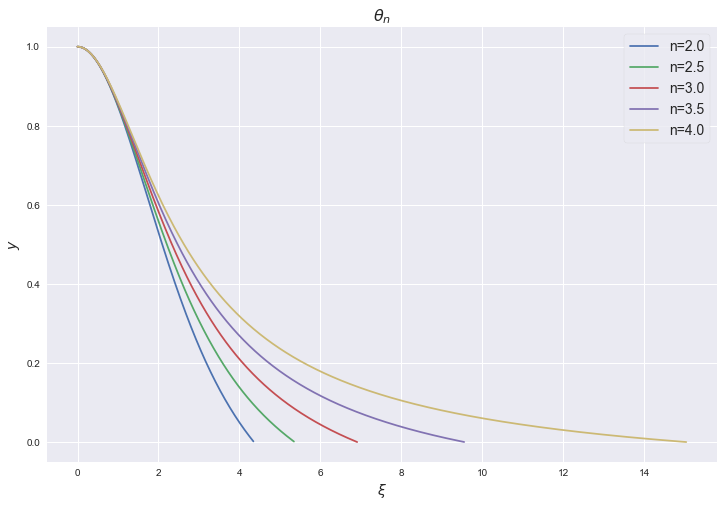

In [61]:
[plt.plot(res.t, res.y[0], label=f'n={val:.1f}') for res, val in zip(ress, ns)]
plt.legend(frameon=True)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$y$')
plt.title(r'$\theta_n$')

Text(0.5,1,'$d\\theta_n / d\\xi$')

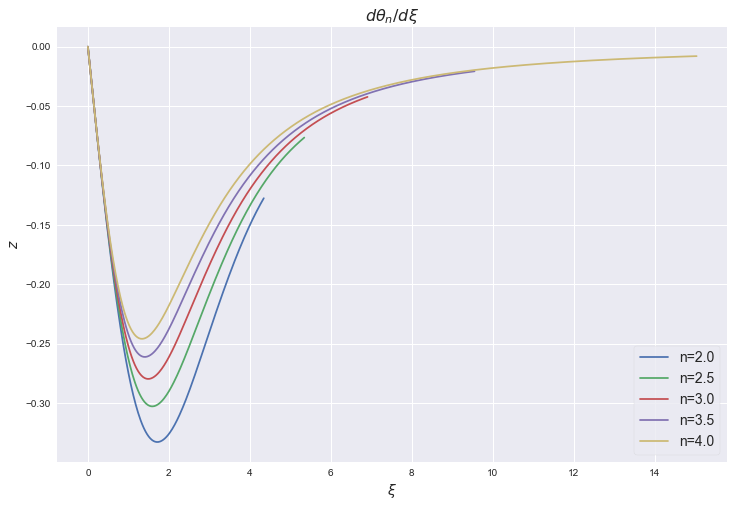

In [63]:
[plt.plot(res.t, res.y[1], label=f'n={val:.1f}') for res, val in zip(ress, ns)]
plt.legend(frameon=True)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$z$')
plt.title(r'$d\theta_n / d\xi$')